# TITANIC

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df = df.drop(['PassengerId',"Name","SibSp","Parch","Cabin","Ticket","Embarked"],axis="columns")

In [26]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [27]:
inputs = df.drop('Survived',axis="columns")
target = df["Survived"]

In [28]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [29]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le_sex = LabelEncoder()

In [32]:
inputs["sex_n"] = le_sex.fit_transform(inputs["Sex"])

In [46]:
inputs_n = inputs.drop("Sex", axis="columns")
inputs_n.Age = inputs_n.Age.fillna(inputs_n.Age.mean())
inputs_n.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [47]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.2)

In [55]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [57]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
model.score(x_test,y_test)

0.7597765363128491

In [69]:
model.predict([[2,28,9,0]])

C:\Users\KIIT\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# VISUALISATION

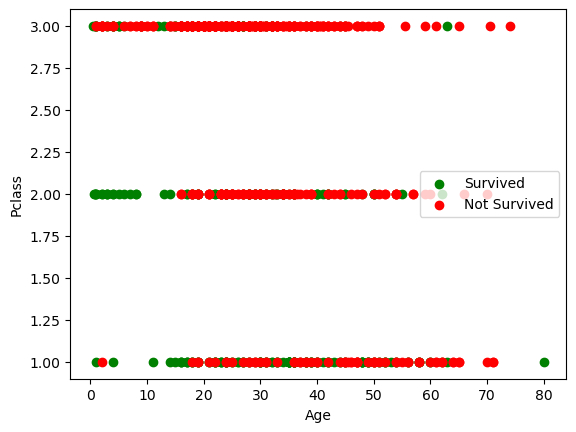

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

# select the attributes we want to use for plotting
titanic_subset = titanic[['Pclass', 'Age', 'Fare', 'Sex', 'Survived']]

# drop any rows with missing values using .loc
titanic_subset = titanic_subset.loc[titanic_subset[['Pclass', 'Age', 'Fare', 'Sex']].notnull().all(axis=1)]

# create a new column to map sex to numbers (0 for female, 1 for male) using .loc
titanic_subset.loc[:, 'SexNum'] = titanic_subset['Sex'].map({'female': 0, 'male': 1})

# create two separate data frames for survivors and non-survivors
survived = titanic_subset[titanic_subset['Survived'] == 1]
not_survived = titanic_subset[titanic_subset['Survived'] == 0]

# create a scatter plot of survivors and non-survivors
plt.scatter(survived['Age'], survived['Pclass'], color='green', label='Survived')
plt.scatter(not_survived['Age'], not_survived['Pclass'], color='red', label='Not Survived')

# set the x and y axis labels
plt.xlabel('Age')
plt.ylabel('Pclass')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12028\3335762454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_subset.dropna(inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_12028\3335762454.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_subset.loc[:, 'SexNum'] = titanic_subset['Sex'].map({'female': 0, 'male': 1})


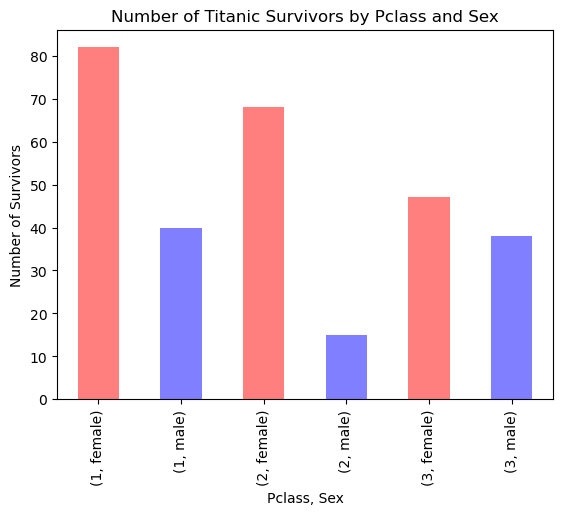

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

# select the attributes we want to use for plotting
titanic_subset = titanic[['Pclass', 'Age', 'Fare', 'Sex', 'Survived']]

# drop any rows with missing values
titanic_subset.dropna(inplace=True)

# create a new column to map sex to numbers (0 for female, 1 for male) using .loc[]
titanic_subset.loc[:, 'SexNum'] = titanic_subset['Sex'].map({'female': 0, 'male': 1})

# group the data by Pclass and Sex and count the number of survivors in each group
grouped_data = titanic_subset.groupby(['Pclass', 'Sex'])['Survived'].sum()

# create a bar chart of the grouped data
grouped_data.plot(kind='bar', color=['red', 'blue'], alpha=0.5)

# set the x and y axis labels
plt.xlabel('Pclass, Sex')
plt.ylabel('Number of Survivors')

# set the title of the plot
plt.title('Number of Titanic Survivors by Pclass and Sex')

# show the plot
plt.show()
